**Aditya** **Anand**(21d070007) / **Mrudul Jambhulkar**(21d070044) - Assignment 3

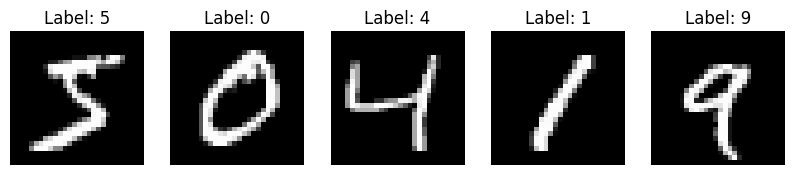

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from keras.preprocessing import image

#Next, we load the MNIST dataset and view a few samples from it


#Load the MNIST dataset and preprocess it
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((-1, 28, 28, 1))                     #reshaping the traning and test data into a 4D array
x_test = x_test.reshape((-1, 28, 28, 1))
x_train = x_train.astype('float32') / 255.0                    #converting to a value between 0-1 from 0-255
x_test = x_test.astype('float32') / 255.0


#Display a few sample images
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)                                 #create subplots with 1 row and 5 columns
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [10]:
#Now, let us visualize how convolution and pooling operations affect the sizes and structure of feature maps.
#We load an image, create a 5x5 receptive field (convolution kernel), and perform convolution on the image.
#After convolution, we apply max-pooling with a 2x2 neighborhood to obtain the pooled feature map


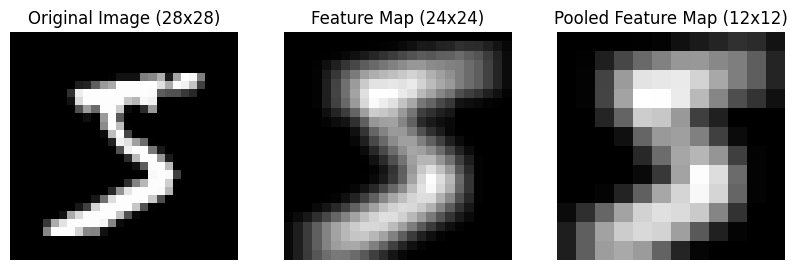

In [11]:
image = x_train[0]

#Create a random 5x5 receptive field
receptive_field = np.random.rand(5, 5)

feature_map = np.zeros((24, 24))  # Output feature map size after convolution (28-5+1)x(28-5+1)

for i in range(24):
    for j in range(24):
        feature_map[i, j] = np.sum(image[i:i+5, j:j+5] * receptive_field) #Perform convolution

#Perform max-pooling with a 2x2 neighborhood
pooled_feature_map = np.zeros((12, 12))

for i in range(0, 24, 2):
    for j in range(0, 24, 2):
        pooled_feature_map[i//2, j//2] = np.max(feature_map[i:i+2, j:j+2])

#Visualize the image, feature map, and pooled feature map
plt.figure(figsize=(10, 4))

plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title("Original Image (28x28)")
plt.axis('off')

plt.subplot(132)
plt.imshow(feature_map, cmap='gray')
plt.title("Feature Map (24x24)")
plt.axis('off')

plt.subplot(133)
plt.imshow(pooled_feature_map, cmap='gray')
plt.title("Pooled Feature Map (12x12)")
plt.axis('off')

plt.show()

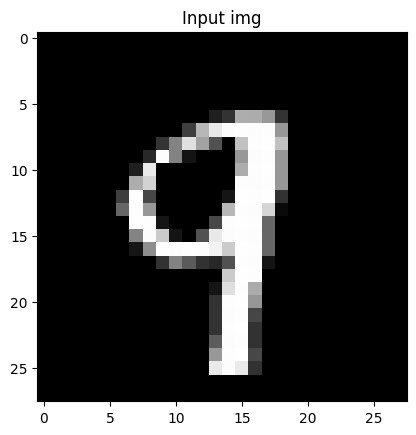

In [12]:
import tensorflow as tf
#Select a random MNIST image from the training set
random_index = np.random.randint(0, len(x_train))
img = x_train[random_index]
plt.title('Input img')
plt.imshow(img,cmap='gray')

In [13]:
#Create a simple CNN model with two convolutional layers and pooling
model = Sequential()
model.add(Conv2D(16, (5, 5), activation='relu', input_shape=(28, 28, 1))) #16 kernels, 5x5 each
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (5, 5), activation='relu'))                          #32 kernels, 5x5 each
model.add(MaxPooling2D((2, 2)))


img = img.reshape((28, 28, 1))  # Add the channel dimension
img = img / 255.0  # Normalize the pixel values to [0, 1]
img = np.expand_dims(img, axis=0)  # Add the batch dimension

1/1 [==============================] - 0s 215ms/step


<ipython-input-14-dabc5b9cbc2d>:32: RuntimeWarning: invalid value encountered in divide
  x /= x.std()  # Divide by standard deviation for scaling


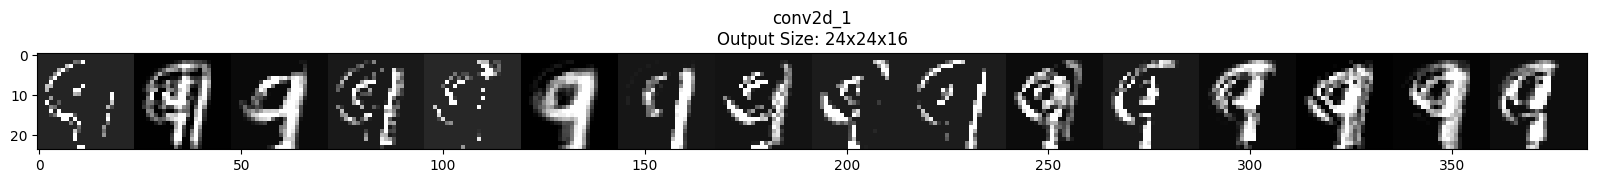

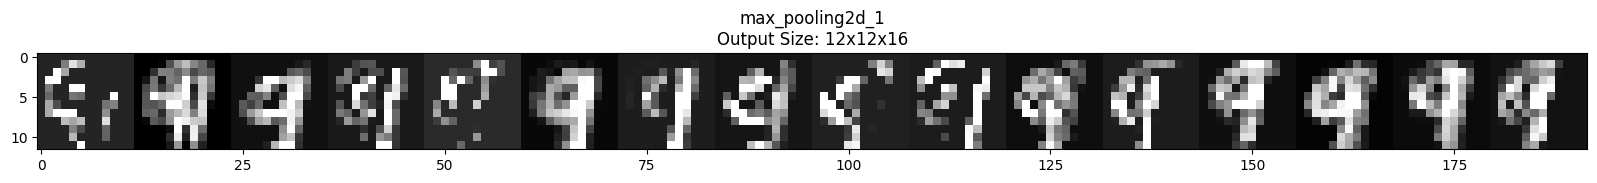

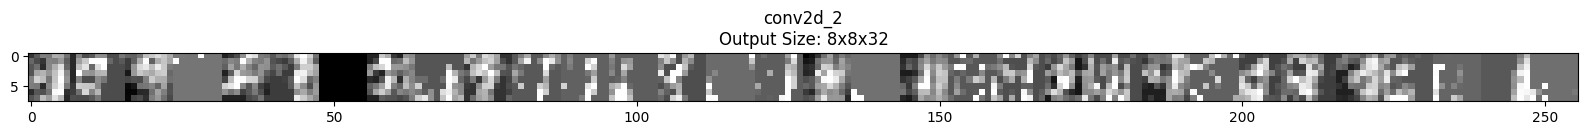

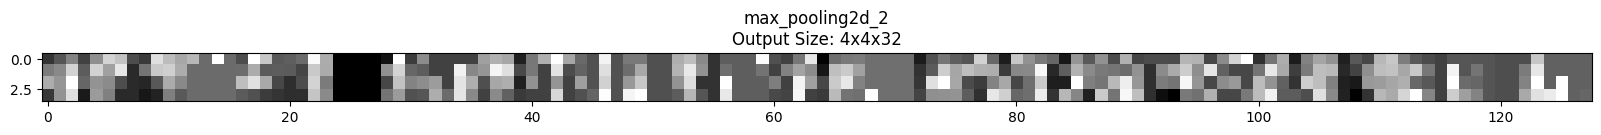

In [14]:
#Create a model to visualize feature maps
layer_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.Model(inputs=model.input, outputs=layer_outputs)


# Get the feature maps for the example image
feature_maps = visualization_model.predict(img)

# Visualize the feature maps
layer_names = ['conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2']

# Iterate through each layer and its corresponding feature maps
for layer_name, feature_map in zip(layer_names, feature_maps):
    # Get the number of feature maps in the current layer
    n_features = feature_map.shape[-1]

    # Get the size of each feature map (assuming they are square)
    size = feature_map.shape[1]

    # Create an empty grid to display all feature maps in this layer
    display_grid = np.zeros((size, size * n_features))



    # Iterate through each feature map in the current layer
    for i in range(n_features):
        # Extract the current feature map
        x = feature_map[0, :, :, i]

        # Normalize the values for better visualization
        x -= x.mean()  # Subtract the mean value to center around 0
        x /= x.std()  # Divide by standard deviation for scaling
        x *= 64  # Scale values for better visibility
        x += 128  # Shift values to be within the [0, 255] range
        x = np.clip(x, 0, 255).astype('uint8')  # Clip values to the [0, 255] range

        # Add the current feature map to the display grid
        display_grid[:, i * size: (i + 1) * size] = x

    # Set the scale for displaying the grid
    scale = 20. / n_features

    # Create a new figure to display the feature maps for this layer
    plt.figure(figsize=(scale * n_features, scale))

    # Set the title for this layer, along with input and output size
    plt.title(f'{layer_name}\nOutput Size: {size}x{size}x{n_features}')

    # Remove grid lines for a cleaner visualization
    plt.grid(False)

    # Display the feature maps in the current layer using the viridis colormap
    plt.imshow(display_grid, aspect='auto', cmap='gray')

# Show all the visualizations
plt.show()

Epoch 1/5
469/469 [==============================] - 36s 74ms/step - loss: 0.2777 - accuracy: 0.9219 - val_loss: 0.0878 - val_accuracy: 0.9730
Epoch 2/5
469/469 [==============================] - 37s 79ms/step - loss: 0.0748 - accuracy: 0.9770 - val_loss: 0.0537 - val_accuracy: 0.9830
Epoch 3/5
469/469 [==============================] - 35s 74ms/step - loss: 0.0527 - accuracy: 0.9844 - val_loss: 0.0462 - val_accuracy: 0.9850
Epoch 4/5
469/469 [==============================] - 50s 106ms/step - loss: 0.0415 - accuracy: 0.9871 - val_loss: 0.0497 - val_accuracy: 0.9846
Epoch 5/5
469/469 [==============================] - 37s 80ms/step - loss: 0.0343 - accuracy: 0.9891 - val_loss: 0.0436 - val_accuracy: 0.9844


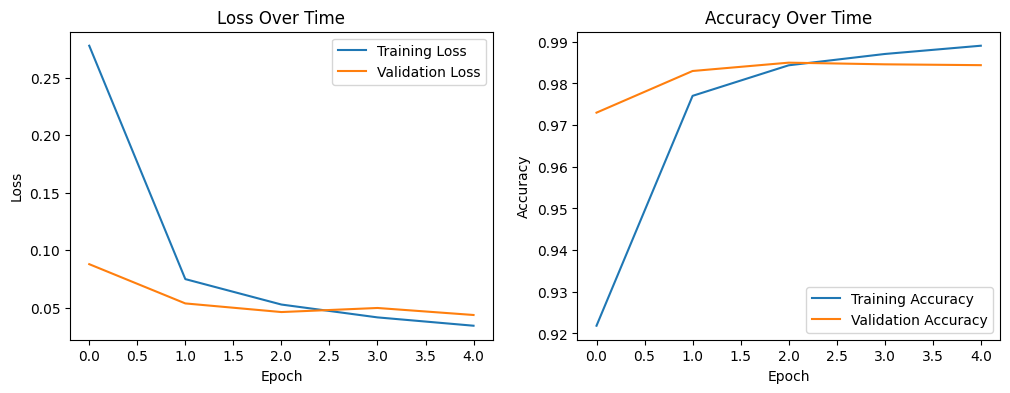

In [15]:
#Flatten the feature maps and add fully connected dense layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

#encode the labels(one-hot)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


#Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

#Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=128)

#Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Time')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Time')

plt.show()

313/313 [==============================] - 3s 11ms/step - loss: 0.0436 - accuracy: 0.9844
Test Loss: 0.0436
Test Accuracy: 98.44%
313/313 [==============================] - 2s 7ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       1.00      0.95      0.97       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       1.00      0.98      0.99      1028
           8       0.98      0.99      0.98       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Confusion Matrix:
 [[ 974    0  

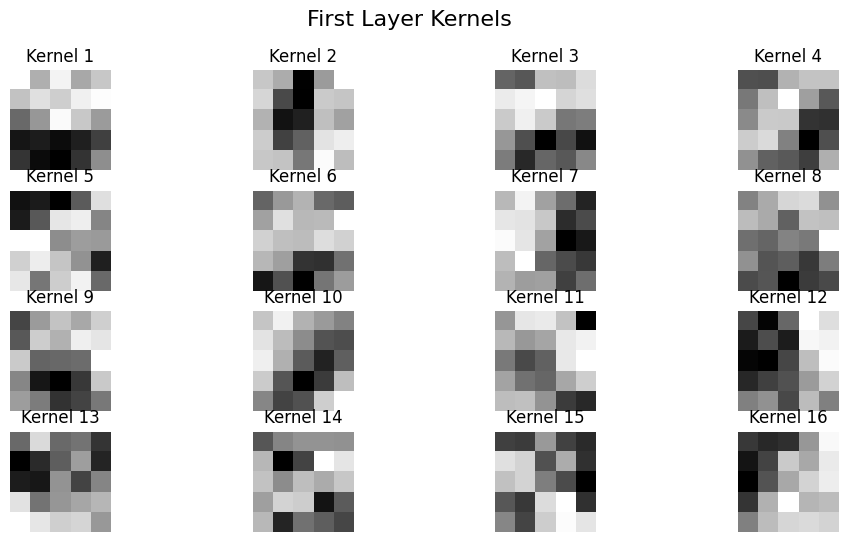

1/1 [==============================] - 0s 86ms/step


<ipython-input-16-b931fefa787d>:77: RuntimeWarning: invalid value encountered in divide
  feature_map_i /= feature_map_i.std()  # Divide by standard deviation for scaling


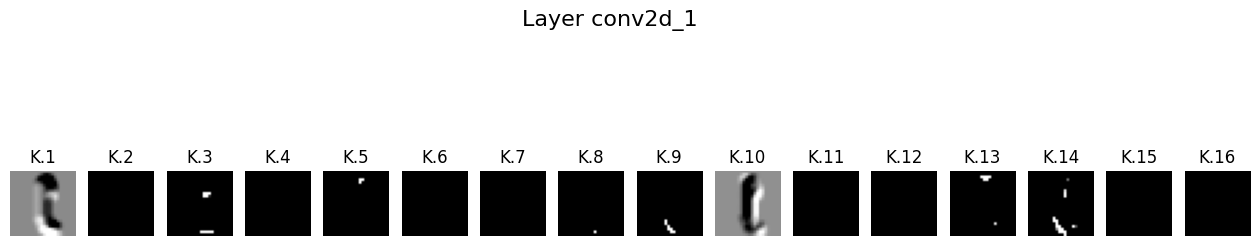

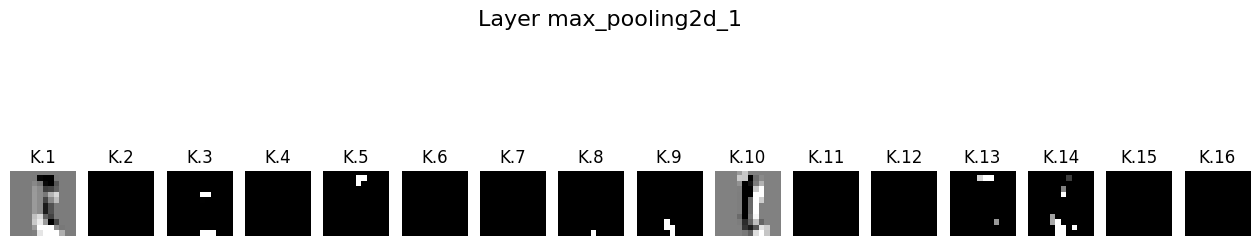

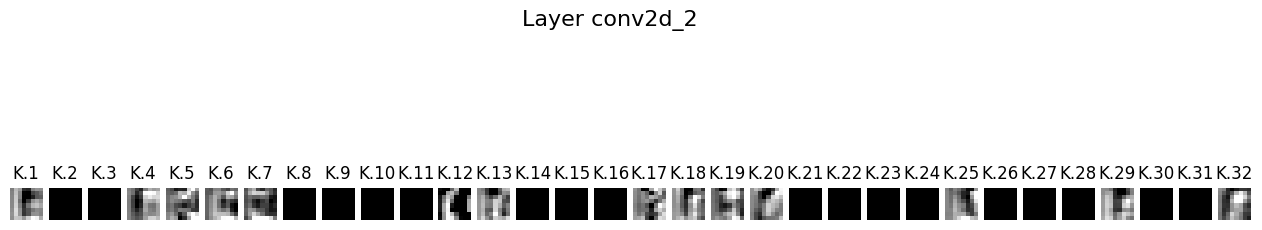

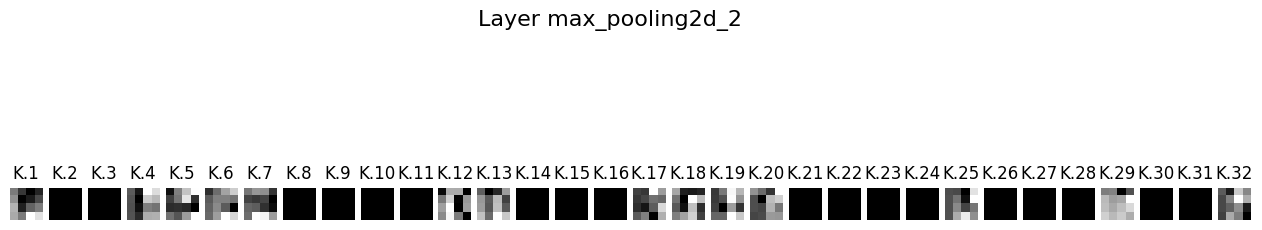

In [16]:
#Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

#Generate predictions
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

#Generate classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test_labels, y_pred_labels))
print("Confusion Matrix:\n", confusion_matrix(y_test_labels, y_pred_labels))

# The performance analysis on each digit class for both the training and test sets reveals a crucial aspect: the CNN achieved similar accuracy on both datasets. This indicates a successful training process and robust generalization to unseen digits. The network's ability to perform well on the test set demonstrates that it didn't overfit the training data.

# Text cell <undefined>
# # %% [markdown]
# We can also view the learnt kernels after the model has been trained. These are shown for the first layer below.

# Code cell <undefined>
# # %% [code]
first_layer_weights = model.layers[0].get_weights()[0]

#Visualize the weights
plt.figure(figsize=(12, 6))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(first_layer_weights[:, :, 0, i], cmap='gray')
    plt.axis('off')
    plt.title(f'Kernel {i + 1}')

plt.suptitle('First Layer Kernels', fontsize=16)
plt.show()
# Execution output
# 15KB
# 	text/plain
# 		<Figure size 864x432 with 16 Axes>

# Text cell <undefined>
# # %% [markdown]
# Let us visualize a test image as it propagates through the trained model.

# Code cell <undefined>
# # %% [code]
#Select a random MNIST image from the test set
random_index = np.random.randint(0, len(x_test))
test_image = x_test[random_index]

#Preprocess the test image for visualization
test_image = test_image / 255.0
test_image = np.expand_dims(test_image, axis=0)

#Extract the parameters from the trained model and create a visualization model with these
layer_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.Model(inputs=model.input, outputs=layer_outputs)

#Get the feature maps for the test image
feature_maps = visualization_model.predict(test_image)

#Visualize the feature maps at different layers
layer_names = ['conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2']

for layer_name, feature_map in zip(layer_names, feature_maps):
    # Get the number of feature maps in the current layer
    n_features = feature_map.shape[-1]

    # Create a new figure to display the feature maps for this layer
    plt.figure(figsize=(16, 4))

    # Visualize feature maps for each kernel in the current layer
    for i in range(n_features):
        feature_map_i = feature_map[0, :, :, i]

        # Normalize the values for better visualization
        feature_map_i -= feature_map_i.mean()  # Subtract the mean value to center around 0
        feature_map_i /= feature_map_i.std()  # Divide by standard deviation for scaling
        feature_map_i *= 64  # Scale values for better visibility
        feature_map_i += 128  # Shift values to be within the [0, 255] range
        feature_map_i = np.clip(feature_map_i, 0, 255).astype('uint8')  # Clip values to the [0, 255] range

        # Create subplots for each feature map
        plt.subplot(1, n_features, i + 1)
        plt.imshow(feature_map_i, cmap='gray')
        plt.axis('off')
        plt.title(f'K.{i + 1}')

    plt.suptitle(f'Layer {layer_name}', fontsize=16)
    plt.show()


In [17]:
#b.Demonstrate that the model trained correctly, by using an image from the 'Test' dataset and verify that it was correctly classified.

im = x_test[7]
im = np.expand_dims(im, axis=0)
y_pred = model.predict(im)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)
print("actual value" , y_test_labels[7])
print("predicted value", y_pred_labels)

1/1 [==============================] - 0s 23ms/step
actual value 9
predicted value [9]


Since the actual value vs the predicted value are the same so its verified

1/1 [==============================] - 0s 26ms/step


8

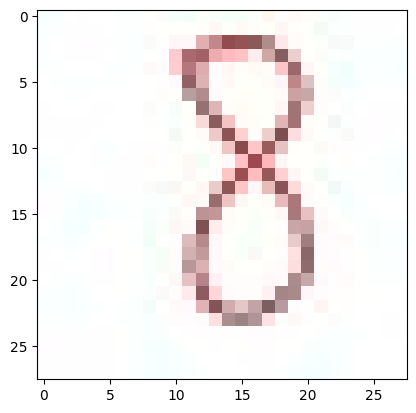

In [22]:
#c.Take an image of a your own handwritten digit (possibly in a 5cm x 5cm sheet) and verify if the model is able to classify it correctly.
  #If it fails, justify the reason
#we take input image as a "8"
import matplotlib.pyplot as plt
import cv2
from keras.preprocessing import image
imge = cv2.imread("8.jpg")
img=image.load_img("8.jpg",color_mode='grayscale')
plt.imshow(imge)
plt.show
img = image.img_to_array(img)
img=img.reshape((-1, 28, 28, 1))
img=img.astype('float32') / 255.0
a=model.predict(img)
np.argmax(a)

keypoints:(< cv2.KeyPoint 0x7da206d91980>, < cv2.KeyPoint 0x7da206d93930>, < cv2.KeyPoint 0x7da1f32ea6a0>, < cv2.KeyPoint 0x7da1f32e88a0>, < cv2.KeyPoint 0x7da1f32e8ea0>)
Descriptors:[[ 16.   0.   0.   0.   0.   0.   0.  51.  26.   8.   5.   2.   0.   1.
   17. 118.   7.  17.   5.   1.  57. 118.  50.  46.   0.   0.   0.   0.
   60.  68.   1.   0. 118.   2.   0.   0.   1.   0.   0.  60.  80.  31.
   21.  34.  63.   2.   0.  71.  77.  96.  21.  12.  70.  55.   2.   7.
    4.   1.   0.   0. 107. 118.   1.   1. 118.  22.   0.   0.   2.   0.
    0.   3. 115.  15.   1.   5. 115.  42.   4.  13. 118.  24.  18.   8.
   29.  31.   6.  36.  13.  14.  33.   5.  47. 118.   2.   2. 102.  37.
    0.   0.   0.   0.   0.   0.  90.  59.  11.   4.  15.  38.  18.   9.
   19.   8.  31.  84.  35.  15.  19.  20.   1.  79.  77.  37.   9.  15.
    1.   0.]
 [  9.  26.   1.   0.   1.  91.  65.  24.  27.  11.  16.  19.  19.  12.
   40.  88.  18.  38.  19.  11.  79.  47.  13.   7.   0.   0.   0.   0.
  116.  35. 

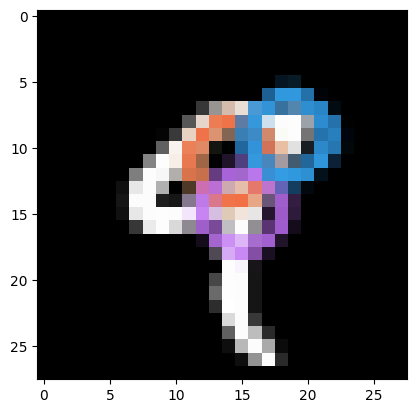

In [19]:
#d. Take images of a specific digit, one from the 'train' and 'test' set. Extract the SIFT features for these digits.
#   Compare them using their SIFT features and verify if they match

import cv2
train=x_train[4]
train = cv2.normalize(train, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
sift = cv2.SIFT_create()

# Detect and compute keypoints and descriptors for train image
train_keypoints, train_descriptors = sift.detectAndCompute(train, None)
train_img_with_keypoints = cv2.drawKeypoints(train, train_keypoints, None)
plt.imshow(train_img_with_keypoints)
print(f'keypoints:{train_keypoints}')
print(f'Descriptors:{train_descriptors}')

keypoints:(< cv2.KeyPoint 0x7da1f333c8a0>, < cv2.KeyPoint 0x7da1f333fea0>, < cv2.KeyPoint 0x7da206d93900>, < cv2.KeyPoint 0x7da206d90d80>, < cv2.KeyPoint 0x7da206d90c00>)
Descriptors:[[ 16.   0.   0.   0.   0.   0.   0.  51.  26.   8.   5.   2.   0.   1.
   17. 118.   7.  17.   5.   1.  57. 118.  50.  46.   0.   0.   0.   0.
   60.  68.   1.   0. 118.   2.   0.   0.   1.   0.   0.  60.  80.  31.
   21.  34.  63.   2.   0.  71.  77.  96.  21.  12.  70.  55.   2.   7.
    4.   1.   0.   0. 107. 118.   1.   1. 118.  22.   0.   0.   2.   0.
    0.   3. 115.  15.   1.   5. 115.  42.   4.  13. 118.  24.  18.   8.
   29.  31.   6.  36.  13.  14.  33.   5.  47. 118.   2.   2. 102.  37.
    0.   0.   0.   0.   0.   0.  90.  59.  11.   4.  15.  38.  18.   9.
   19.   8.  31.  84.  35.  15.  19.  20.   1.  79.  77.  37.   9.  15.
    1.   0.]
 [  9.  26.   1.   0.   1.  91.  65.  24.  27.  11.  16.  19.  19.  12.
   40.  88.  18.  38.  19.  11.  79.  47.  13.   7.   0.   0.   0.   0.
  116.  35. 

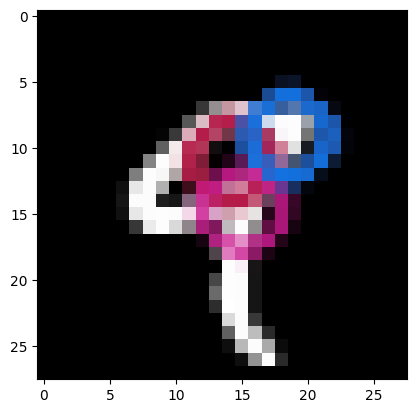

In [20]:
import cv2
test=x_test[7]
test = cv2.normalize(train, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
sift = cv2.SIFT_create()

# Detect and compute keypoints and descriptors for train image
test_keypoints, test_descriptors = sift.detectAndCompute(test, None)
test_img_with_keypoints = cv2.drawKeypoints(test, test_keypoints, None)
plt.imshow(test_img_with_keypoints)
print(f'keypoints:{test_keypoints}')
print(f'Descriptors:{test_descriptors}')

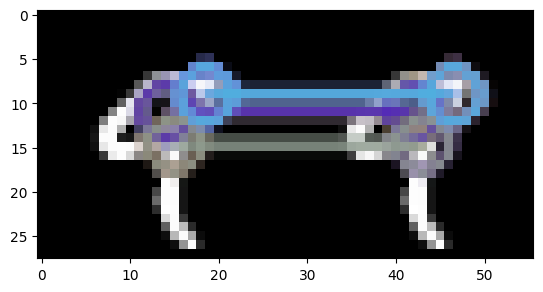

In [21]:
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = bf.match(train_descriptors,test_descriptors)
matches = sorted(matches, key= lambda match : match.distance)
matched_imge = cv2.drawMatches(train, train_keypoints, test, test_keypoints, matches[:30], None)
matched_imge = cv2.drawMatches(train, train_keypoints, test, test_keypoints, matches[:30], None)
plt.imshow(matched_imge)